### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [128]:
data = pd.read_csv('data/coupons.csv')

In [129]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.
Computing the sum of the null values across the columns, it is apparent that the data for the 'car' column is significantly incomplete.  Some of the other categories, like 'Bar, 'CoffeeHouse', etc. are also missing data, but not to the same extent as the 'car' column.

In [130]:
data.shape

(12684, 26)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [132]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## 3. Decide what to do about your missing data -- drop, replace, other...
Since there were so many missing values, I decided to drop the column altogether from the dataset.  I did this by using the dropna() and drop() functions on the dataframe in place to drop the null values and then the column altogether.

In [133]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [134]:
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [135]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [136]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [137]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [138]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [139]:
data[data['Bar'].isnull()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,1,1,0,1,0


In [140]:
data.dropna(subset=data.columns.difference(['car']), inplace=True)
print(data.shape)
print(data.info())
data.head()

(12079, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  car                   108 non-null    object
 15  Bar                   1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [141]:
data.drop('car', axis=1, inplace=True)

In [142]:
data.dropna(subset=data.columns.difference(['car']), inplace=True)
print(data.shape)
print(data.info())
data.head()

(12079, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


## 4. What proportion of the total observations chose to accept the coupon? 
56.93%


In [143]:
'{:.2f}%'.format(data['Y'].value_counts(normalize=True).loc[1] * 100)

'56.93%'

## 5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Bar'),
 Text(3, 0, 'Carry out & Take away'),
 Text(4, 0, 'Restaurant(20-50)')]

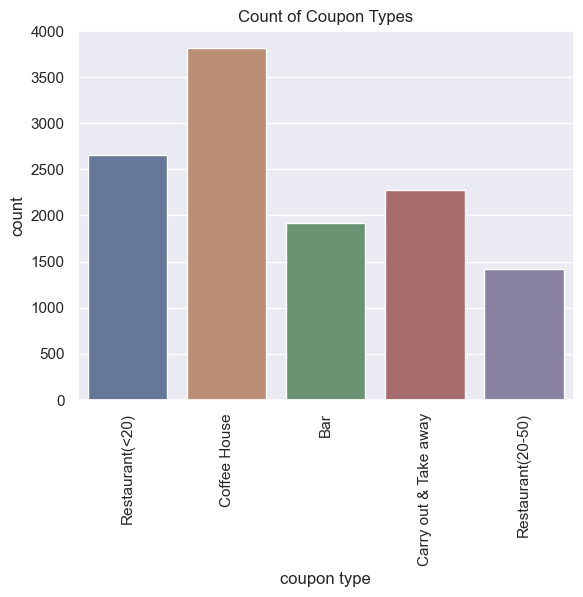

In [144]:
ax = sns.countplot(x=data['coupon'], saturation=0.5)
ax.set_title('Count of Coupon Types')
ax.set_xlabel('coupon type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## 6. Use a histogram to visualize the temperature column.

80    6222
55    3662
30    2195
Name: temperature, dtype: int64


Text(0.5, 1.0, 'Distribution of Temperatures')

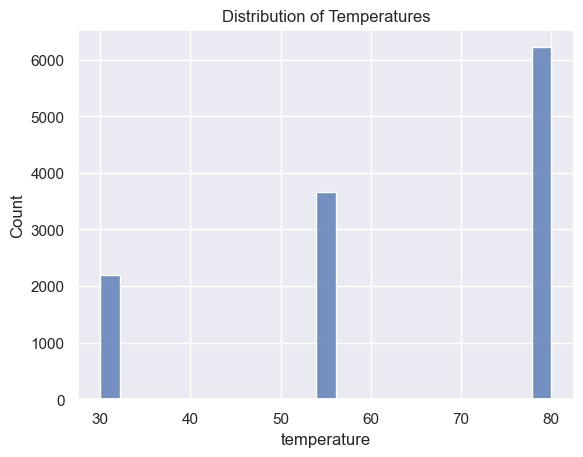

In [145]:
print(data['temperature'].value_counts())
ax = sns.histplot(x=data['temperature'])
ax.set_title('Distribution of Temperatures')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

## 1. Create a new `DataFrame` that contains just the bar coupons.


In [146]:
bar_df = data[data['coupon'] == 'Bar']
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


## 2. What proportion of bar coupons were accepted?
41.19%

In [147]:
'{:.2f}%'.format(bar_df['Y'].value_counts(normalize=True).loc[1] * 100)

'41.19%'

## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
The acceptance rate for those who went to the bar over 3 times a month is 76.17% and the acceptance rate for those when went to the bar 3 times or fewer a month is 37.27%.

In [148]:
bar_df['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [149]:
bar_df['over_3_bar_visits'] = (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')

/var/folders/mm/0pdxsmlj7bdfl7xbbq4l1hc80000gn/T/ipykernel_4914/966910011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['over_3_bar_visits'] = (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')


In [150]:
bar_df['over_3_bar_visits'].value_counts()

False    1720
True      193
Name: over_3_bar_visits, dtype: int64

In [151]:
bar_df.groupby('over_3_bar_visits')['Y'].value_counts(normalize=True) * 100

over_3_bar_visits  Y
False              0    62.732558
                   1    37.267442
True               1    76.165803
                   0    23.834197
Name: Y, dtype: float64

## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
For those who are over 25 and go to the bar more than once a month, the acceptance rate is 68%.  This rate is about the same as those who are under 25 and go to the bar more than once a month.

In [152]:
bar_df['age'].value_counts()

21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: age, dtype: int64

In [153]:
bar_df['over_25'] = (bar_df['age'] != 'below21') & (bar_df['age'] != '21')

/var/folders/mm/0pdxsmlj7bdfl7xbbq4l1hc80000gn/T/ipykernel_4914/4076191275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['over_25'] = (bar_df['age'] != 'below21') & (bar_df['age'] != '21')


In [154]:
bar_df['over_25'].value_counts()

True     1435
False     478
Name: over_25, dtype: int64

In [155]:
bar_df['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [156]:
bar_df['more_than_1_monthly_bar_visit'] = (bar_df['Bar'] != 'never') & (bar_df['Bar'] != 'less1')

/var/folders/mm/0pdxsmlj7bdfl7xbbq4l1hc80000gn/T/ipykernel_4914/2721457544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['more_than_1_monthly_bar_visit'] = (bar_df['Bar'] != 'never') & (bar_df['Bar'] != 'less1')


In [157]:
bar_df['more_than_1_monthly_bar_visit'].value_counts()

False    1341
True      572
Name: more_than_1_monthly_bar_visit, dtype: int64

In [158]:
bar_df.groupby(['over_25', 'more_than_1_monthly_bar_visit'])['Y'].value_counts(normalize=True) * 100

over_25  more_than_1_monthly_bar_visit  Y
False    False                          0    61.165049
                                        1    38.834951
         True                           1    67.455621
                                        0    32.544379
True     False                          0    73.255814
                                        1    26.744186
         True                           1    68.982630
                                        0    31.017370
Name: Y, dtype: float64

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
For the particular group named in the question, the acceptance rate is 71.43%.

In [159]:
bar_df = bar_df.rename(columns={'passanger':'passenger'})

In [160]:
bar_df['passenger'].value_counts()

Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: passenger, dtype: int64

In [161]:
bar_df['occupation'].value_counts()

Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

In [162]:
filtered_df = bar_df.query('more_than_1_monthly_bar_visit == True & passenger != "Kid(s)" & passenger != "Alone" & occupation != "Farming Fishing & Forestry"')

In [163]:
'{:.2f}%'.format(filtered_df['Y'].value_counts(normalize=True).loc[1] * 100)

'71.43%'

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed **71.43%**
- go to bars more than once a month and are under the age of 30 **71.95%**
- go to cheap restaurants more than 4 times a month and income is less than 50K **45.65%**



In [164]:
bar_df['maritalStatus'].value_counts()

Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64

In [165]:
non_widower_with_no_kids_who_drink_at_bars_monthly_or_more = bar_df.query('more_than_1_monthly_bar_visit == True & passenger != "Kid(s)" & passenger != "Alone" & maritalStatus != "Widowed"')

In [166]:
'{:.2f}%'.format(non_widower_with_no_kids_who_drink_at_bars_monthly_or_more['Y'].value_counts(normalize=True).loc[1] * 100)

'71.43%'

In [167]:
bar_df['age'].value_counts()

21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: age, dtype: int64

In [168]:
under_30_drivers_who_drink_at_bars_monthly_or_more = bar_df.query('more_than_1_monthly_bar_visit == True & age in ["21", "26", "below21"]')

In [169]:
'{:.2f}%'.format(under_30_drivers_who_drink_at_bars_monthly_or_more['Y'].value_counts(normalize=True).loc[1] * 100)

'71.95%'

In [170]:
bar_df['RestaurantLessThan20'].value_counts()

1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: RestaurantLessThan20, dtype: int64

In [171]:
bar_df['income'].value_counts()

$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: income, dtype: int64

In [172]:
cheap_restaurant_lovers = bar_df.query('RestaurantLessThan20 in ["4~8", "gt8"] & income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')

In [173]:
'{:.2f}%'.format(cheap_restaurant_lovers['Y'].value_counts(normalize=True).loc[1] * 100)

'45.65%'

## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
Based on the fact that the acceptance rate of bar coupons among those who go to bars more than once a month was around 71-72% and the fact that the acceptance rate of bar coupons among those who go to cheap restaurants more than 4 times a month was 45-46%, we can say that a driver's demonstrated track record of going to bars is more predictive of accepting bar coupons.  This is demonstrated by the fact that even people who go out to eat a lot at cheap restaurants don't nearly have the same acceptance rate as those who go to bars even occasionally.  The fact that a driver is a demonstrated bar-goer is more predictive.

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

First, I grouped by the coupon type in order to see the acceptance rates of the different types of coupons.  I clearly saw that the coupons most likely to be accepted were for the coupon types: 'Carry out & Take away' and 'Restaurant(20-50)'.  I collectively refer to these coupons as the fast_and_cheap_restaurants and I plotted the relative acceptance rates just to visualize the data and present the difference in acceptance rates visually.

After isolating the universe of coupons to those that exhibited the highest acceptance rates, I wanted to cross-reference against different categories of contextual attributes.  We know from the earlier data on acceptance rates by coupon types that those for fast and cheap restaurants tended to get accepted at significantly higher rates.  I wanted to see if we could further increase that acceptance rate since it seemed like those coupon types tended to be successfully accepted.  What I found is that the time of day can further increase the odds that a coupon is accepted.  At 2 and 6 pm, the acceptance rates on these coupons were in the 82% range, which is around 10% higher than those coupons were accepted overall.  Thus, it would make sense to target these coupons to these drivers in the afternoon timeframe between 2 and 6 pm.  This insight is further supported by the fact that none of the other contextual attributes exhibited a similar significant positive difference over the group percentage acceptance rate.

In [174]:
data['coupon'].value_counts()

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

In [175]:
data.groupby(['coupon'])['Y'].value_counts(normalize=True) * 100

coupon                 Y
Bar                    0    58.808155
                       1    41.191845
Carry out & Take away  1    73.771930
                       0    26.228070
Coffee House           0    50.366876
                       1    49.633124
Restaurant(20-50)      0    55.398730
                       1    44.601270
Restaurant(<20)        1    70.900867
                       0    29.099133
Name: Y, dtype: float64

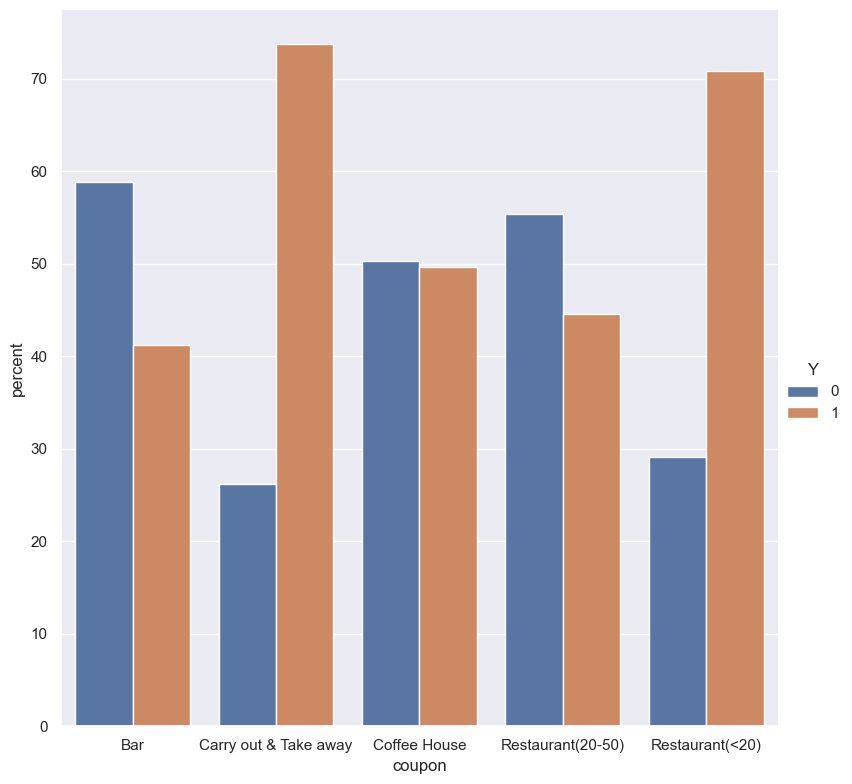

In [176]:
sns.set(color_codes=True)
x,y = 'coupon', 'Y'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=8))

In [177]:
fast_and_cheap_restaurants = data.query('coupon == "Carry out & Take away" | coupon == "Restaurant(<20)"')
fast_and_cheap_restaurants.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1


In [178]:
fast_and_cheap_restaurants.groupby(['destination'])['Y'].value_counts(normalize=True) * 100

destination      Y
Home             1    69.006381
                 0    30.993619
No Urgent Place  1    78.233685
                 0    21.766315
Work             1    62.960063
                 0    37.039937
Name: Y, dtype: float64

In [179]:
fast_and_cheap_restaurants.groupby(['toCoupon_GEQ5min'])['Y'].value_counts(normalize=True) * 100

toCoupon_GEQ5min  Y
1                 1    72.227853
                  0    27.772147
Name: Y, dtype: float64

In [180]:
fast_and_cheap_restaurants.groupby(['toCoupon_GEQ15min'])['Y'].value_counts(normalize=True) * 100

toCoupon_GEQ15min  Y
0                  1    75.608696
                   0    24.391304
1                  1    69.274592
                   0    30.725408
Name: Y, dtype: float64

In [181]:
fast_and_cheap_restaurants.groupby(['toCoupon_GEQ25min'])['Y'].value_counts(normalize=True) * 100

toCoupon_GEQ25min  Y
0                  1    74.709236
                   0    25.290764
1                  1    52.372263
                   0    47.627737
Name: Y, dtype: float64

In [182]:
fast_and_cheap_restaurants.groupby(['direction_same'])['Y'].value_counts(normalize=True) * 100

direction_same  Y
0               1    73.707013
                0    26.292987
1               1    67.822581
                0    32.177419
Name: Y, dtype: float64

In [183]:
fast_and_cheap_restaurants.groupby(['direction_opp'])['Y'].value_counts(normalize=True) * 100

direction_opp  Y
0              1    67.822581
               0    32.177419
1              1    73.707013
               0    26.292987
Name: Y, dtype: float64

In [184]:
fast_and_cheap_restaurants.groupby(['weather'])['Y'].value_counts(normalize=True) * 100

weather  Y
Rainy    1    53.579176
         0    46.420824
Snowy    1    59.476117
         0    40.523883
Sunny    1    76.641381
         0    23.358619
Name: Y, dtype: float64

In [185]:
fast_and_cheap_restaurants.groupby(['temperature'])['Y'].value_counts(normalize=True) * 100

temperature  Y
30           1    66.612773
             0    33.387227
55           1    72.603902
             0    27.396098
80           1    74.811283
             0    25.188717
Name: Y, dtype: float64

In [186]:
fast_and_cheap_restaurants.groupby(['passanger'])['Y'].value_counts(normalize=True) * 100

passanger  Y
Alone      1    68.586194
           0    31.413806
Friend(s)  1    78.275401
           0    21.724599
Kid(s)     1    70.588235
           0    29.411765
Partner    1    76.557864
           0    23.442136
Name: Y, dtype: float64

In [187]:
fast_and_cheap_restaurants.groupby(['time'])['Y'].value_counts(normalize=True).sort_values(ascending=False) * 100

time  Y
2PM   1    82.623705
6PM   1    82.446809
10AM  1    70.656371
10PM  1    63.718821
7AM   1    62.960063
      0    37.039937
10PM  0    36.281179
10AM  0    29.343629
6PM   0    17.553191
2PM   0    17.376295
Name: Y, dtype: float64